# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Anggi Septriana Putri
- Email: anggiseptrianaa28@gmail.com
- Id Dicoding: https://www.dicoding.com/users/anggiseptrianaputri/academies

## Menentukan Pertanyaan Bisnis

- Berapa penyewaan sepeda perbulan berdasarkan musim?
- Bagaimana kondisi cuaca saat penyewaan sepeda dalam jumlah total bulanan?

## Menyiapkan semua library yang dibutuhkan
library yang dipakai pada projek ini yaitu numpy, pandas, matplot, seaborn

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data
- pada proyek ini menggunakan 1 dataset Bike Sharing perhari (day.csv)

In [5]:
bike_df=pd.read_csv("data/day.csv", delimiter=",")

In [6]:
#melihat baris 1 teratas berdasarkan array
bike_df.head(1)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


### Assessing Data

#### Menilai tabel `bike_df`

In [7]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
bike_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
print("Jumlah duplikasi: ", bike_df.duplicated().sum())

Jumlah duplikasi:  0


In [10]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

#### `Duplicate Data`
karna jumlah duplikasi tidak ada lanjut ke missing values

In [11]:
print("Jumlah duplikasi: ", bike_df.duplicated().sum())

Jumlah duplikasi:  0


#### `Missing Values`
Tidak ada missing values

In [12]:
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### `Rename Column`
Menamakan ulang kolom agar variabel mudah dibaca

In [13]:
bike_df.rename(columns={'instant':'rec_id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition','hum':'humidity','cnt':'total_count'},inplace=True)

In [14]:
bike_df.head(2)

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801


## Exploratory Data Analysis (EDA)

### Explore `bike_df`

In [15]:
#mengeksplorasi lebih banyak parameter statistik non numerikal
bike_df.describe(include="all")

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [16]:
bike_df.rec_id.is_unique

True

#### - mengelompokkan penyewa pada hari kerja dan kecepatan angin berdasarkan variabel musim (season)

In [17]:
bike_df.groupby(by="season").agg({
    "workingday": "count", 
    "windspeed": ["max", "min", "mean", lambda x: x.max() - x.min()]
}).sort_values(by=("workingday", "count"), ascending=True)

workingday windspeed                               
            count       max       min      mean <lambda_0>
season                                                    
4             178  0.422275  0.022392  0.171995   0.399883
1             181  0.507463  0.045408  0.214537   0.462055
2             184  0.388067  0.065929  0.203507   0.322138
3             188  0.375617  0.064071  0.172095   0.311546

### - mengelompokkan penyewa pada musim (season) dan kondisi cuaca (weather_condition) berdasarkan variabel bulan (month)

In [18]:
bike_df.groupby(by="month").season .nunique()

month
1     1
2     1
3     2
4     1
5     1
6     2
7     1
8     1
9     2
10    1
11    1
12    2
Name: season, dtype: int64

In [19]:
bike_df.groupby(by="month").weather_condition .nunique()

month
1     3
2     3
3     3
4     3
5     2
6     2
7     3
8     2
9     3
10    3
11    3
12    3
Name: weather_condition, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa penyewaan sepeda perbulan berdasarkan musim?

C:\Users\HP PC\.conda\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP PC\.conda\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP PC\.conda\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP PC\.conda\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

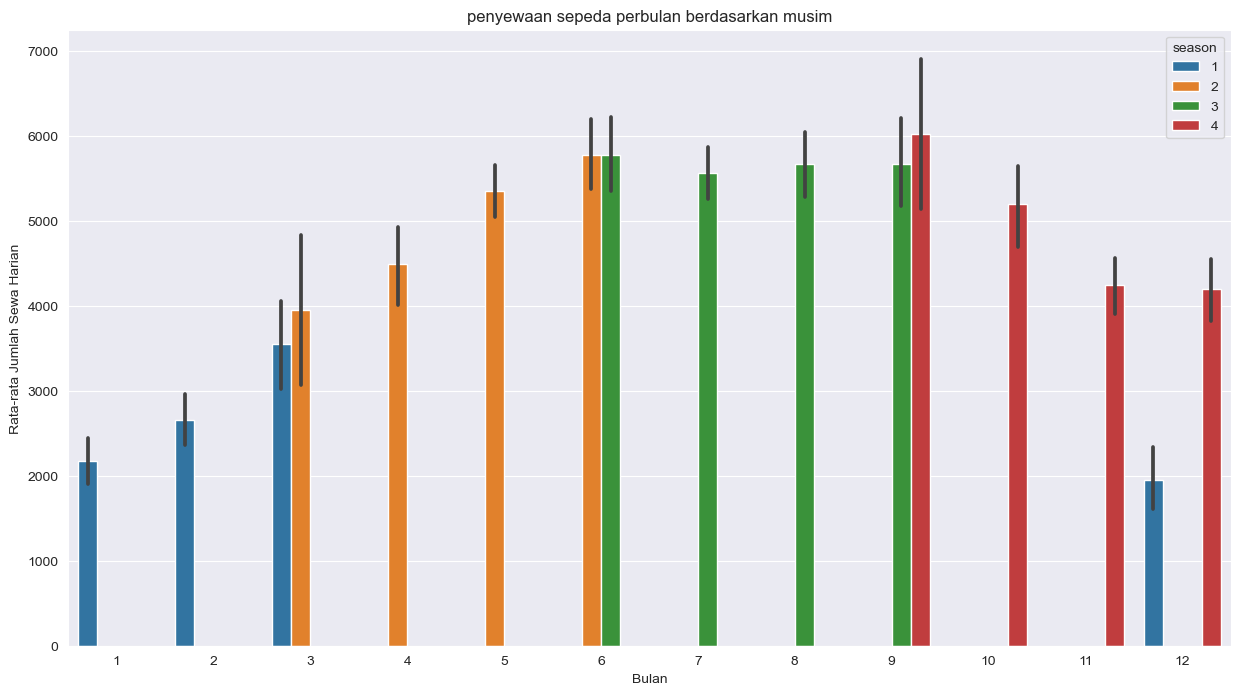

In [20]:
#mengatur panjang lebar background
fig,ax=plt.subplots(figsize=(15,8))
#mengatur warna background
sns.set_style('darkgrid')
#membuat bar plot penyewaan sepeda berdasarkan musim
sns.barplot(x='month',y='total_count',data=bike_df[['month','total_count','season']],hue='season',ax=ax)
ax.set_title('penyewaan sepeda perbulan berdasarkan musim')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Sewa Harian')
plt.show()

### Pertanyaan 2: Bagaimana kondisi cuaca saat penyewaan sepeda dalam jumlah total bulanan?

C:\Users\HP PC\.conda\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP PC\.conda\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP PC\.conda\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


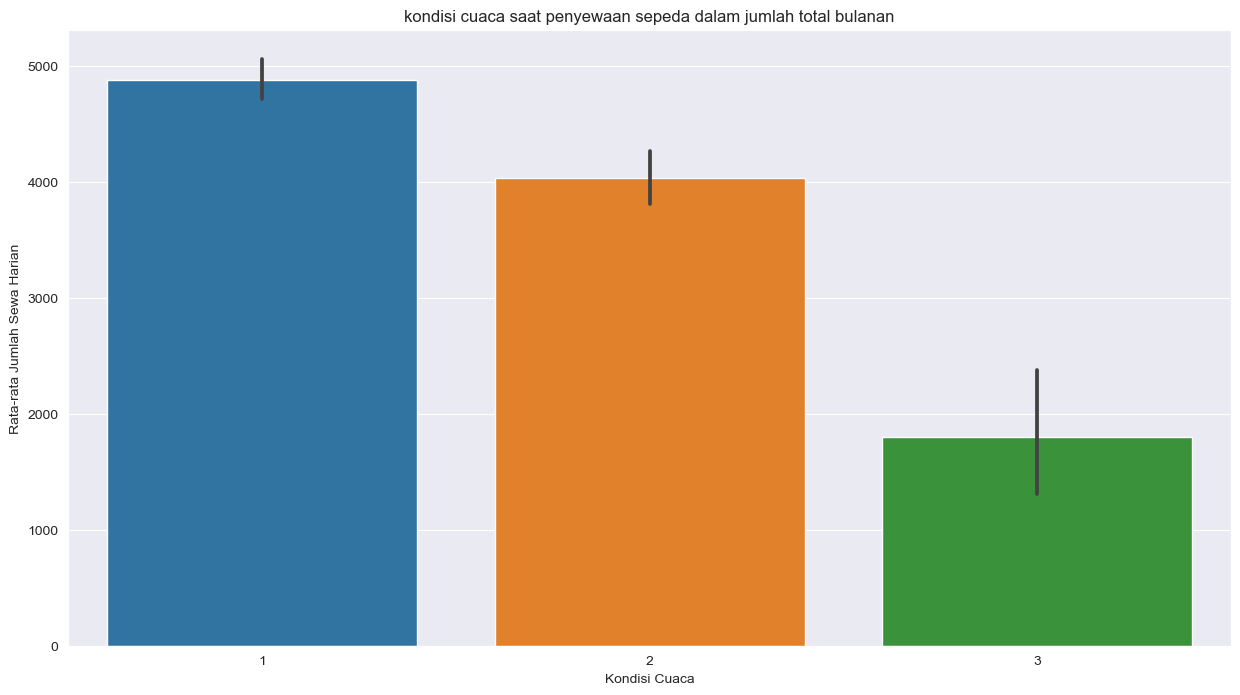

In [21]:
#mengatur panjang lebar background
fig,ax1=plt.subplots(figsize=(15,8))
#mengatur warna background
sns.set_style('dark')
#membuat bar plot kondisi cuaca saat penyewaan sepeda dalam jumlah total bulanan
sns.barplot(x='weather_condition',y='total_count',data=bike_df[['month','total_count','weather_condition']],ax=ax1)
ax1.set_title('kondisi cuaca saat penyewaan sepeda dalam jumlah total bulanan')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Sewa Harian')
plt.show()

## Conclusion

#### - Conclution pertanyaan 1
Dari plot di atas, kita dapat mengamati bahwa jumlah penyewaan sepeda meningkat pada musim semi dan musim panas dan kemudian jumlah penyewaan sepeda turun pada musim gugur dan musim dingin.
- 1: spring, 2: summer, 3: fall, 4: winter

#### - conclution pertanyaan 2
Dari diagram batang di atas, kita dapat mengamati bahwa pada saat cuaca cerah dan berawan sebagian, jumlah penyewaan sepeda paling tinggi dan tertinggi kedua pada saat cuaca berawan kabut dan diikuti oleh tertinggi ketiga pada saat cuaca salju ringan dan hujan ringan.
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
